# **Applied Statistics**

---

**Author: Damien Farrell**

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import scipy.stats as stats
import statsmodels as sm

sns.set_theme()

---

## **Task One: Permutations and Combinations**

> Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
<br><br>
> Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
<br><br>
> Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

#### **References**

1. [How to ](https://stackoverflow.com/questions/5980042)
1. [Panda](https://www.statology.org/pandas-unique-values-in-column/)

---

## Cups of Tea

In [3]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [4]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

In [5]:
# There is only 1 correct outcome
correct_outcomes = 1

# Probability of selecting the correct 6 cups
probability = correct_outcomes / ways

probability

0.0010822510822510823

The probability that the person, guessing randomly, correctly identifies all six cups with milk poured first is approximately 0.108%.

In [6]:
# Probability of exactly 5 correct guesses (and 1 incorrect)
probability_five_correct = (
    math.comb(no_cups_milk_first, 5) * math.comb(no_cups - no_cups_milk_first, 1)
) / math.comb(no_cups, 6)

# Total probability of at most one error
prob_at_most_one_error = probability + probability_five_correct

prob_at_most_one_error

0.04004329004329004

There is approximately 4% chance that the person guesses with at most one error.

---

## **Task Two: numpy's Normal Distribution**


> In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.
<br><br>
> Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.
<br><br>
> Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

#### **References**

1. [How to ](https://stackoverflow.com/questions/5980042)
1. [Panda](https://www.statology.org/pandas-unique-values-in-column/)

---

In [7]:
# Generate a random normal sample.
data = np.random.normal(10, 3, 100_000)

# Show.
data

array([13.26999947,  6.31007862,  9.4282568 , ..., 12.99944433,
        6.62749995,  9.75215345])

In [8]:
def f(x, mu=10.0, sigma=3.0):
  # The normalisation constant.
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

In [9]:
# Create an x range.
x = np.linspace(-50, 50, 100_000)

# Get y values.
y = f(x)

# Show.
x, y

(array([-50.        , -49.99899999, -49.99799998, ...,  49.99799998,
         49.99899999,  50.        ]),
 array([1.84031612e-88, 1.85262590e-88, 1.86501782e-88, ...,
        3.33960576e-40, 3.32479641e-40, 3.31005236e-40]))

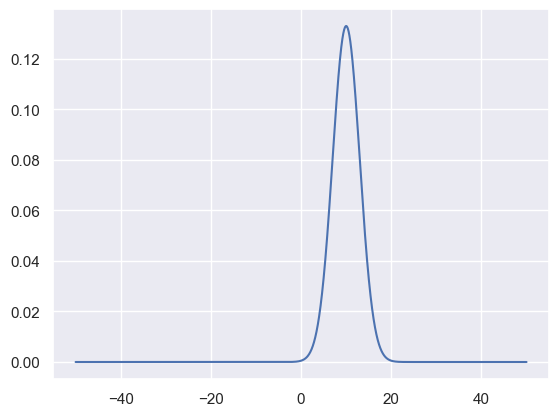

In [10]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y);

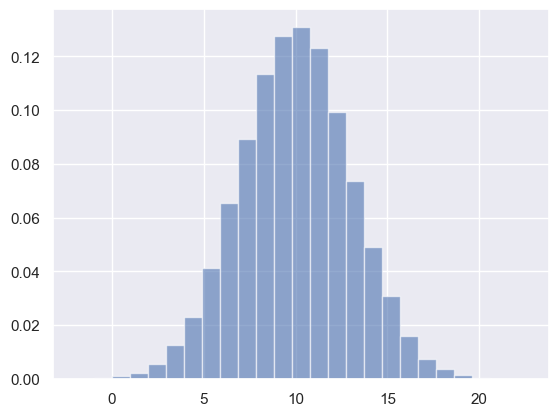

In [11]:
# Plotting the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

plt.show()

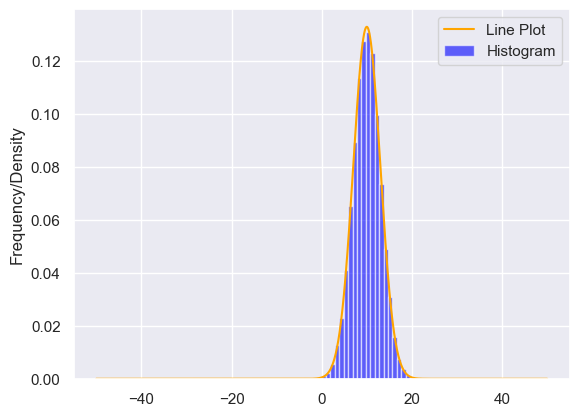

In [12]:
# Create an empty plot
fig, ax = plt.subplots()

# Plot the line function
ax.plot(x, y, label='Line Plot', color='orange')

# Plotting the histogram
ax.hist(data, bins=25, density=True, alpha=0.6, color='blue', label='Histogram')

# Adding labels and legend
ax.set_ylabel('Frequency/Density')
ax.legend()

# Display the plot
plt.show()

In [13]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

c:\Users\Damien\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9999780243503842), pvalue=np.float64(0.8679618837772491))

---

## **Task Three - **

> Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
<br><br>

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

> Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

<br>

#### **References**

1. [Basic](https://realpython.com/python-data-types/)
1. [Using ](https://realpython.com/pandas-python-explore-dataset/)

---

In [14]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

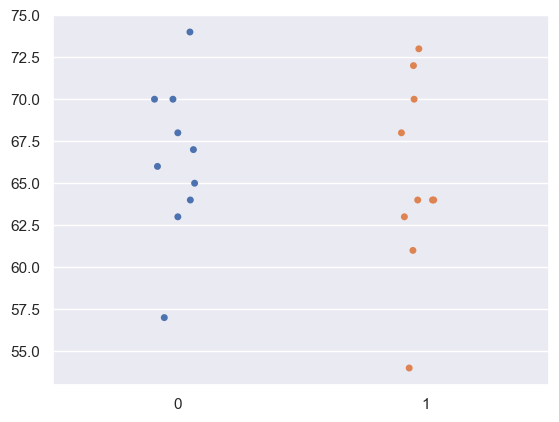

In [15]:
sns.stripplot(data=[before,after]);

In [16]:
# Paired samples t-test.
scipy_stats = stats.ttest_rel(before, after)

scipy_stats

TtestResult(statistic=np.float64(1.337227482480628), pvalue=np.float64(0.21396011317404623), df=np.int64(9))

Manual
https://www.youtube.com/watch?v=k9Slvhkha3U
put formula in here

In [17]:
difference = before - after

difference

array([-1,  4,  2,  0,  1, -3, -2,  3,  5,  2])

In [18]:
mean_difference = np.mean(difference)

mean_difference

# Sample standard deviation
std_difference = np.std(difference, ddof=1)

std_difference

np.float64(2.6012817353502227)

In [19]:
n = len(difference)  # Number of observations
t_stat_manual = mean_difference / (std_difference / np.sqrt(n))

t_stat_manual

np.float64(1.3372274824806283)

State hyptosisis

There is no difference between the mean of the two groups

alternative: they are not equal

---
## Task Three

> In this test we will estimate the probability of committing a type II error in specific circumstances.
> To begin, create a variable called `no_type_ii` and set it to `0`.
<br><br>
> Now use a loop to perform the following test 10,000 times.
<br><br>
> 1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 
<br><br>
> 2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.
<br><br>
> Summarize and explain your results.
<br>

#### **References**


1. [How to ](https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/)



---


In [ ]:
no_type_ii = 0

def create_samples():
    sample_1 = np.random.normal(4.9, 0.1, 100)
    sample_2 = np.random.normal(5.0, 0.1, 100)
    sample_3 = np.random.normal(5.1, 0.1, 100)
    df = pd.DataFrame({'Sample 1': sample_1, 'Sample 2': sample_2, 'Sample 3': sample_3})
    return df

for _ in range(10_001):
    df = create_samples()
    # Perform ANOVA.
    f_statistic, p_value = stats.f_oneway(df['Sample 1'], df['Sample 2'], df['Sample 3'])
    if p_value > 0.05:
        no_type_ii += 1

no_type_ii

0

TIDY THIS CRAP UP. MAKING FUNCTION FOR IT ALL AND SEPERATE THE VARIABLES

In [ ]:
# Create data frame.


# Show.
df

,Sample 1,Sample 2,Sample 3
0,4.860972,4.932219,5.065735
1,4.866989,4.929648,4.889522
2,4.831036,5.053058,5.095216
3,4.946460,5.093410,5.085731
4,5.025040,4.990809,4.997092
...,...,...,...
95,4.834827,4.925891,5.171935
96,4.992183,4.941611,5.049576
97,5.037646,5.148497,5.112568
98,5.032816,4.899239,5.139863


In [23]:
# Describe.
df.describe()

,Sample 1,Sample 2,Sample 3
count,100.000000,100.000000,100.000000
mean,4.905694,5.006528,5.098205
std,0.097641,0.108717,0.090973
min,4.614260,4.756374,4.889522
25%,4.830935,4.932151,5.029101
50%,4.909971,4.996482,5.113409
75%,4.977110,5.081044,5.155684
max,5.153710,5.263120,5.265464


***
# End